In [ ]:
# Notebook 5: Detección y reconocimiento de caras

# Importaos las librerias necesarias
import cv2 # Importamos OpenCV para procesamiento de imágenes
import numpy as np # Importamos numpy para manejo de arrays
import matplotlib.pyplot as plt # Importamos matplotlib para visualización
from google.colab.patches import cv2_imshow # Importamos cv2_imshow para mostrar imágenes en Colab}


In [ ]:
# 1. Descargar los clasificadores en cascada pre entrenados para detección facial
# Estos son archivos XML con patrones pre entrenados para detección
!wget -O haarcascade_frontalface_default.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget -O haarcascade_eye.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

--2025-11-15 03:12:22--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.02s   

2025-11-15 03:12:22 (45.7 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2025-11-15 03:12:22--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... c

In [ ]:
# Cargar los clasificadores cascada
# Cargamos el clasificador para rostros frontales
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Cargamso el clasificador para ojos
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [ ]:
# 2. Cargar una imagen de ejemplo con rostros (usamos la imagen 'lena.jpg' que sabemos es accesible)
from urllib.request import urlopen # Para abir URLs

# URL de una iamgen de ejemplo con un rostro
url = 'https://img.freepik.com/foto-gratis/diseno-collage-personas_23-2148888275.jpg?semt=ais_hybrid&w=740&q=80'

# Abrimos la URL y leemos los bytes en la imagen
resp = urlopen(url)

#Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
#Decodificamos el array como una iamgen usando OpenCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# Creamos una copia visualización en RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convertimos a escala de grises para la detección (mejora eficiencia)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [ ]:
# Abrimos la URL y leemos los bytes de la imagen
from urllib.request import urlopen
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Dceodificamos el array como una imagen usando OpenCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# Creamos una copia para visualización RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convertimos a escala de grises para la detección
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# 3. Detectar rostros en la imagen
# faces contiene las coordenadas (x,y,w,h) de cada rostro detectado
faces = face_cascade.detectMultiScale(
    gray_image, # Imagen en escala de grises
    scaleFactor=1.1, # Fator de escala para crear la pirámide de imágenes
    minNeighbors=5, # Cuántos vecinos debe tener cada candidato para ser aceptado. Es la cantidad de características que vamos a ver si es una cara o no.
    minSize=(30, 30) # Tamaño mínimo posible de una cara
)

In [ ]:
# 4. Crear copia de la imagen para dibujar los resultados
result_image = image_rgb.copy()

In [ ]:
# 5. Dibujar rectángulos alrededor de los rostros detectados
for(x, y, w, h) in faces:
  # Dibujamos un rectángulo verde alrededor de la cara (x, y, ancho, alto)
  cv2.rectangle(result_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

  #Región de interés en escala de grises (para la detección de ojos)
  roi_gray = gray_image[y:y+h, x:x+w]
  # Rergión de interés en color
  roi_color = result_image[y:y+h, x:x+w]

  # Detectamos los ojos dentros de la región facial
  eyes = eye_cascade.detectMultiScale(
      roi_gray, # Usamos solo parte gris que corresponde a la cara
      scaleFactor=1.1,
      minNeighbors=5,
      minSize=(5, 5)
  )

  # Dibujamos rectángulos azules alrededor de los ojos
  for(ex, ey, ew, eh) in eyes:
    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)


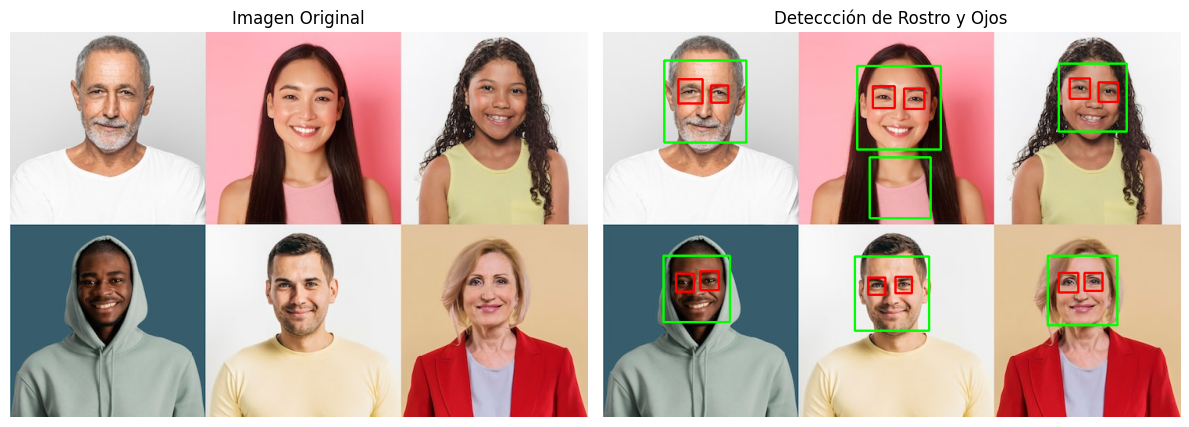

In [ ]:
# 6. Visualización de los resultados
plt.figure(figsize=(12, 6)) # Creamos una figura con tamaño específico

# Imagen original
plt.subplot(1, 2, 1) # Creamos un subplot en la posición
plt.title('Imagen Original') # Añadimos un título
plt.imshow(image_rgb) # Mostramos la imagen original
plt.axis('off') # Ocultamos los ejes

#Imagen con detecciones
plt.subplot(1, 2, 2) # Creamos un subplot en la posición 2
plt.title('Deteccción de Rostro y Ojos') # Añadimos un título
plt.imshow(result_image) # Mostramos la imagen con las detecciones
plt.axis('off') # Ocultamos los ejes

plt.tight_layout() # Ajustamosel layput para que no se superpongan los títulos
plt.show() # Mostramos la figura completa
